# Maximum Drawdown and Calmar Ratio

## Getting ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [3]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139 entries, 2010-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GBP_USD  3139 non-null   float64
 1   USD_GBP  3139 non-null   float64
 2   Levered  3139 non-null   float64
 3   Low_Vol  3139 non-null   float64
 4   Random   3139 non-null   float64
 5   Neutral  3139 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 171.7 KB


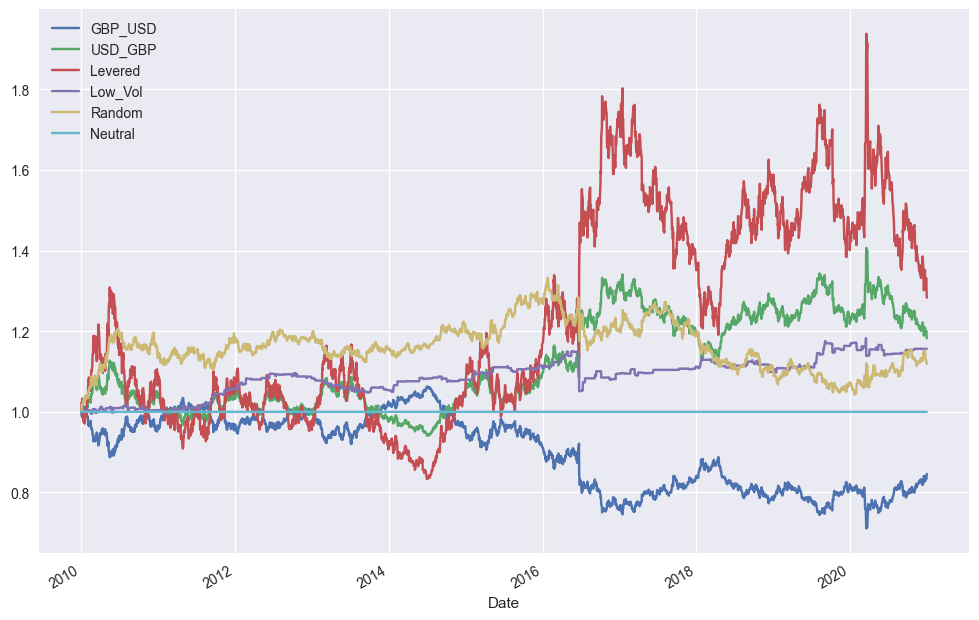

In [4]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

## Maximum Drawdown

In [5]:
symbol = "USD_GBP"

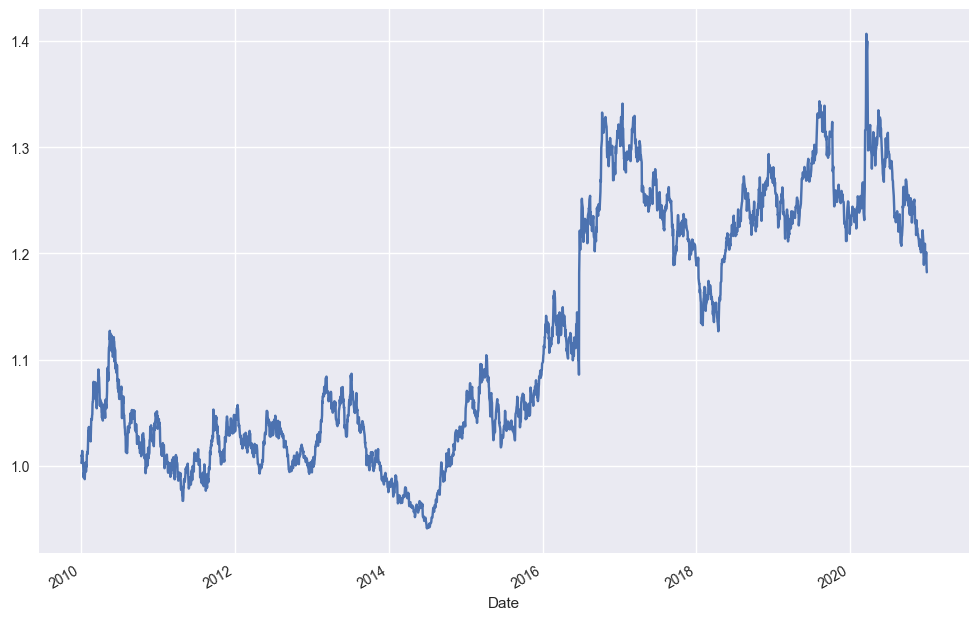

In [6]:
returns[symbol].cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [7]:
instr = returns[symbol].to_frame().copy()
instr

,USD_GBP
Date,
2010-01-02,0.002733
2010-01-03,0.001727
2010-01-04,0.005786
2010-01-05,-0.001687
2010-01-06,0.005446
...,...
2020-12-23,-0.005004
2020-12-27,0.008278
2020-12-28,-0.003799


In [8]:
instr["creturns"] = instr.cumsum().apply(np.exp) # cumulative returns (normalized prices with Base == 1)

In [9]:
instr["cummax"] = instr.creturns.cummax() # cumulative maximum of creturns

In [10]:
instr

,USD_GBP,creturns,cummax
Date,,,
2010-01-02,0.002733,1.002737,1.002737
2010-01-03,0.001727,1.004470,1.004470
2010-01-04,0.005786,1.010299,1.010299
2010-01-05,-0.001687,1.008596,1.010299
2010-01-06,0.005446,1.014104,1.014104
...,...,...,...
2020-12-23,-0.005004,1.191265,1.406706
2020-12-27,0.008278,1.201167,1.406706
2020-12-28,-0.003799,1.196612,1.406706


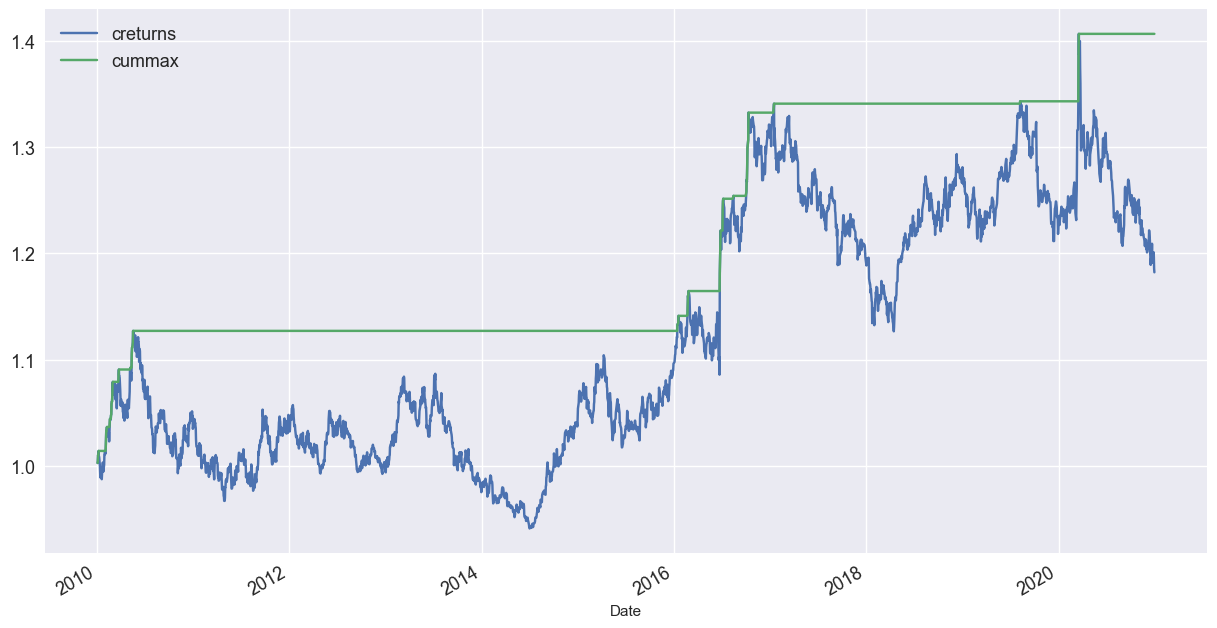

In [11]:
instr[["creturns", "cummax"]].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [12]:
instr["drawdown"] = -(instr["creturns"] - instr["cummax"]) / instr["cummax"] # (pos.) drawdown (in %)
instr

,USD_GBP,creturns,cummax,drawdown
Date,,,,
2010-01-02,0.002733,1.002737,1.002737,-0.000000
2010-01-03,0.001727,1.004470,1.004470,-0.000000
2010-01-04,0.005786,1.010299,1.010299,-0.000000
2010-01-05,-0.001687,1.008596,1.010299,0.001686
2010-01-06,0.005446,1.014104,1.014104,-0.000000
...,...,...,...,...
2020-12-23,-0.005004,1.191265,1.406706,0.153152
2020-12-27,0.008278,1.201167,1.406706,0.146114
2020-12-28,-0.003799,1.196612,1.406706,0.149352


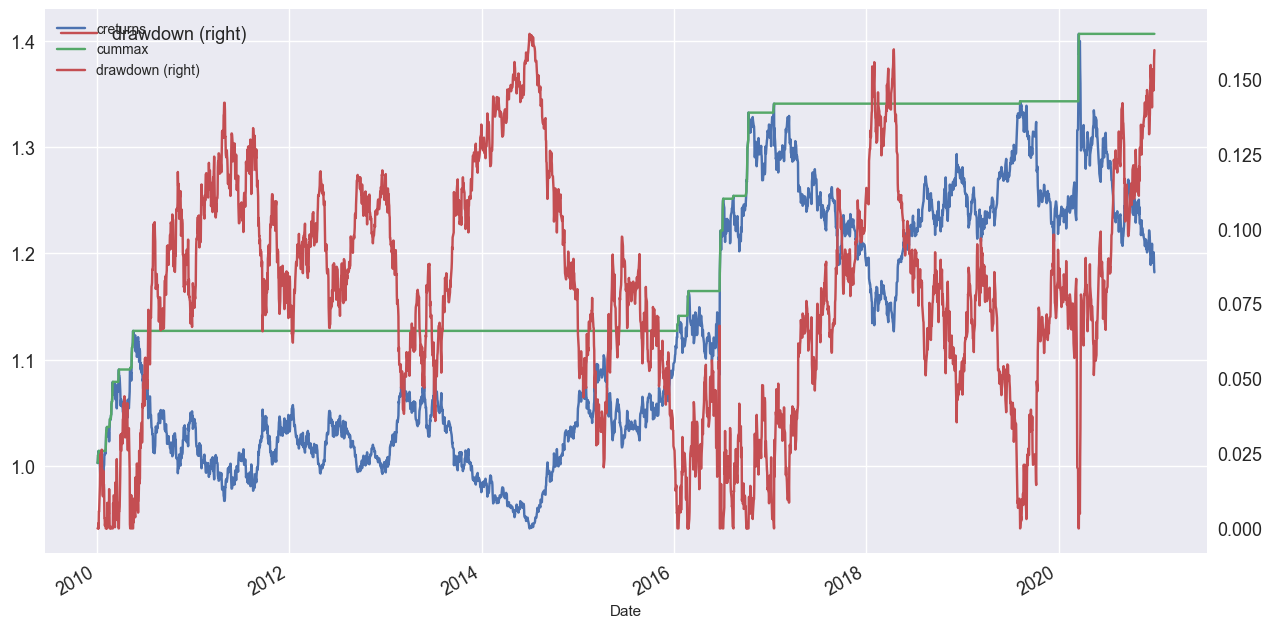

In [13]:
instr[["creturns", "cummax", "drawdown"]].plot(figsize = (15, 8), fontsize = 13, secondary_y = "drawdown")
plt.legend(fontsize = 13)
plt.show()

In [14]:
max_drawdown = instr.drawdown.max() # maximum drawdown
max_drawdown

0.16497535855343645

In [15]:
instr.drawdown.idxmax() # maximum drawdown date 

Timestamp('2014-07-01 00:00:00')

In [16]:
instr.loc[instr.drawdown.idxmax()]

USD_GBP    -0.000915
creturns    0.941169
cummax      1.127116
drawdown    0.164975
Name: 2014-07-01 00:00:00, dtype: float64

In [17]:
(0.941169 - 1.127116) / 1.127116

-0.16497592084576918

## Calmar Ratio

In [18]:
max_drawdown

0.16497535855343645

In [19]:
cagr = np.exp(instr[symbol].sum())**(1/((instr.index[-1] - instr.index[0]).days / 365.25)) - 1 
cagr

0.015347769017337587

In [20]:
calmar = cagr / max_drawdown
calmar

0.0930306753197106

## Max Drawdown Duration

In [21]:
instr

,USD_GBP,creturns,cummax,drawdown
Date,,,,
2010-01-02,0.002733,1.002737,1.002737,-0.000000
2010-01-03,0.001727,1.004470,1.004470,-0.000000
2010-01-04,0.005786,1.010299,1.010299,-0.000000
2010-01-05,-0.001687,1.008596,1.010299,0.001686
2010-01-06,0.005446,1.014104,1.014104,-0.000000
...,...,...,...,...
2020-12-23,-0.005004,1.191265,1.406706,0.153152
2020-12-27,0.008278,1.201167,1.406706,0.146114
2020-12-28,-0.003799,1.196612,1.406706,0.149352


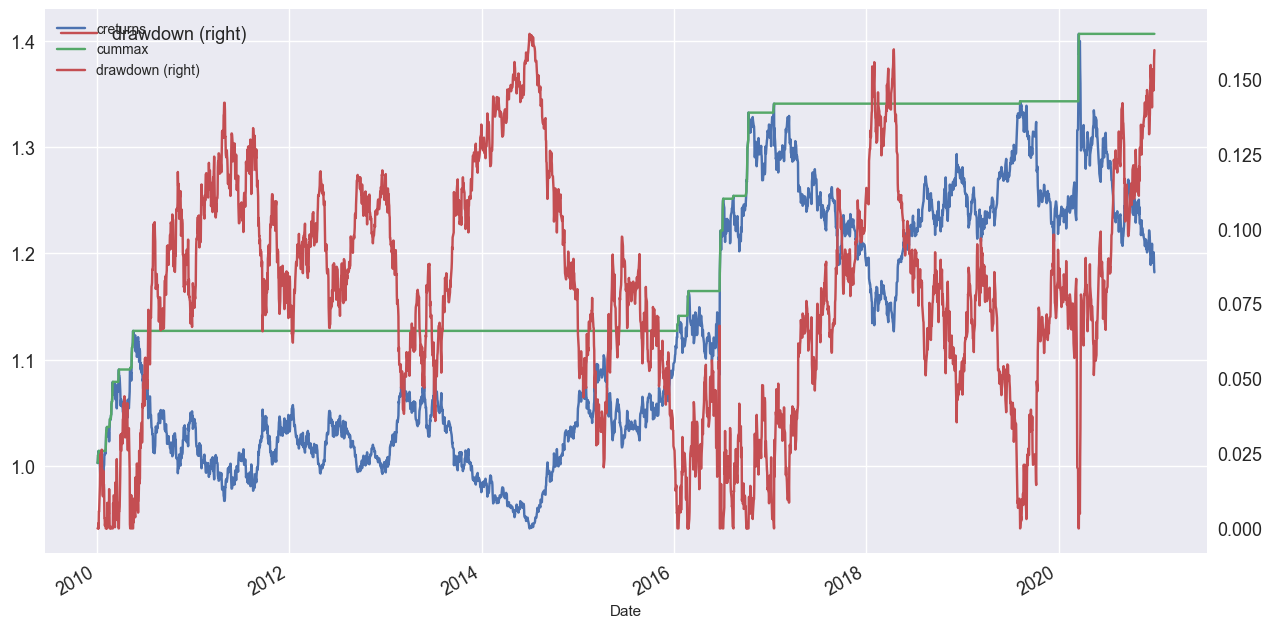

In [22]:
instr[["creturns", "cummax", "drawdown"]].plot(figsize = (15, 8), fontsize = 13, secondary_y = "drawdown")
plt.legend(fontsize = 13)
plt.show()

In [23]:
drawdown = instr.drawdown.copy()
drawdown

Date
2010-01-02   -0.000000
2010-01-03   -0.000000
2010-01-04   -0.000000
2010-01-05    0.001686
2010-01-06   -0.000000
                ...   
2020-12-23    0.153152
2020-12-27    0.146114
2020-12-28    0.149352
2020-12-29    0.157019
2020-12-30    0.159554
Name: drawdown, Length: 3139, dtype: float64

- Drawdown Period: Time Period between peaks 
- recall: whenever drawdown == 0, a new peak has been reached

In [24]:
begin = drawdown[drawdown == 0].index # get all peak dates (beginning of Drawdown periods)
begin

DatetimeIndex(['2010-01-02', '2010-01-03', '2010-01-04', '2010-01-06',
               '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-06',
               '2010-02-07', '2010-02-17', '2010-02-18', '2010-02-22',
               '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26',
               '2010-02-27', '2010-02-28', '2010-03-01', '2010-03-23',
               '2010-03-24', '2010-05-06', '2010-05-07', '2010-05-12',
               '2010-05-13', '2010-05-15', '2010-05-16', '2010-05-17',
               '2016-01-14', '2016-01-17', '2016-01-18', '2016-02-21',
               '2016-02-22', '2016-02-23', '2016-02-25', '2016-06-23',
               '2016-06-26', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-08-14', '2016-10-02', '2016-10-03', '2016-10-05',
               '2016-10-06', '2016-10-09', '2016-10-10', '2017-01-15',
               '2019-08-08', '2020-03-17', '2020-03-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [25]:
end = begin[1:] # get the corresponding end dates for all Drawdown periods
end = end.append(pd.DatetimeIndex([drawdown.index[-1]])) # add last available date
end

DatetimeIndex(['2010-01-03', '2010-01-04', '2010-01-06', '2010-02-02',
               '2010-02-03', '2010-02-04', '2010-02-06', '2010-02-07',
               '2010-02-17', '2010-02-18', '2010-02-22', '2010-02-23',
               '2010-02-24', '2010-02-25', '2010-02-26', '2010-02-27',
               '2010-02-28', '2010-03-01', '2010-03-23', '2010-03-24',
               '2010-05-06', '2010-05-07', '2010-05-12', '2010-05-13',
               '2010-05-15', '2010-05-16', '2010-05-17', '2016-01-14',
               '2016-01-17', '2016-01-18', '2016-02-21', '2016-02-22',
               '2016-02-23', '2016-02-25', '2016-06-23', '2016-06-26',
               '2016-07-04', '2016-07-05', '2016-07-06', '2016-08-14',
               '2016-10-02', '2016-10-03', '2016-10-05', '2016-10-06',
               '2016-10-09', '2016-10-10', '2017-01-15', '2019-08-08',
               '2020-03-17', '2020-03-18', '2020-12-30'],
              dtype='datetime64[ns]', freq=None)

In [26]:
periods = end - begin # time difference between peaks
periods

TimedeltaIndex([   '1 days',    '1 days',    '2 days',   '27 days',
                   '1 days',    '1 days',    '2 days',    '1 days',
                  '10 days',    '1 days',    '4 days',    '1 days',
                   '1 days',    '1 days',    '1 days',    '1 days',
                   '1 days',    '1 days',   '22 days',    '1 days',
                  '43 days',    '1 days',    '5 days',    '1 days',
                   '2 days',    '1 days',    '1 days', '2068 days',
                   '3 days',    '1 days',   '34 days',    '1 days',
                   '1 days',    '2 days',  '119 days',    '3 days',
                   '8 days',    '1 days',    '1 days',   '39 days',
                  '49 days',    '1 days',    '2 days',    '1 days',
                   '3 days',    '1 days',   '97 days',  '935 days',
                 '222 days',    '1 days',  '287 days'],
               dtype='timedelta64[ns]', freq=None)

In [27]:
max_ddd = periods.max() # max drawdown duration
max_ddd

Timedelta('2068 days 00:00:00')

In [28]:
max_ddd.days

2068

## Putting everything together

In [29]:
import pandas as pd
import numpy as np

In [30]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [31]:
def max_drawdown(series):
    creturns = series.cumsum().apply(np.exp)
    cummax = creturns.cummax()
    drawdown = (cummax - creturns)/cummax
    max_dd = drawdown.max()
    return max_dd

In [32]:
returns.apply(max_drawdown).sort_values()

Neutral    0.000000
Low_Vol    0.085782
USD_GBP    0.164975
Random     0.217351
GBP_USD    0.330941
Levered    0.362758
dtype: float64

In [33]:
def calculate_cagr(series):
    return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1

In [34]:
def calmar(series):
    
    max_dd = max_drawdown(series)
    if max_dd == 0:
        return np.nan
    else:
        cagr = calculate_cagr(series)
        calmar = cagr / max_dd
        return calmar

In [35]:
returns.apply(calmar).sort_values(ascending = False)

Low_Vol    0.155046
USD_GBP    0.093031
Levered    0.063303
Random     0.047303
GBP_USD   -0.045675
Neutral         NaN
dtype: float64

In [36]:
def max_dd_duration(series):
    creturns = series.cumsum().apply(np.exp)
    cummax = creturns.cummax()
    drawdown = (cummax - creturns)/cummax
    
    begin = drawdown[drawdown == 0].index
    end = begin[1:]
    end = end.append(pd.DatetimeIndex([drawdown.index[-1]]))
    periods = end - begin
    max_ddd = periods.max()
    return max_ddd.days   

In [37]:
returns.apply(max_dd_duration).sort_values()

Neutral       4
Low_Vol    1188
Random     1800
USD_GBP    2068
Levered    2108
GBP_USD    2374
dtype: int64

-----------------------

## Coding Challenge

__Calculate and compare__ <br>
- __Maximum Drawdown__
- __Calmar Ratio__
- __Maximum Drawdown Duration__ <br>

for __30 large US stocks__ that currently form the Dow Jones Industrial Average Index ("Dow Jones") for the time period between April 2019 and June 2021.

__Hint:__ You can __import__ the price data from __"Dow_Jones.csv"__.
 

Determine the __best performing stock__ and the __worst performing stock__ according to the Calmar Ratio.

__Compare__ Calmar Ratio and Sharpe Ratio. Does the __ranking change__?

(Remark: Dividends are ignored here. Hence, for simplicity reasons, the Calmar Ratio is based on Price Returns only. As a consequence, dividend-paying stocks are getting penalized.) 

## +++ Please stop here in case you don´t want to see the solution!!! +++++

## Coding Challenge Solution

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Dow_Jones.csv", index_col = "Date", parse_dates = ["Date"])
df

In [ ]:
returns = np.log(df / df.shift()) # log returns
returns

__Maximum Drawdown__

In [ ]:
def max_drawdown(series):
    creturns = series.cumsum().apply(np.exp)
    cummax = creturns.cummax()
    drawdown = (cummax - creturns)/cummax
    max_dd = drawdown.max()
    return max_dd

In [ ]:
returns.apply(max_drawdown).sort_values()

__Calmar Ratio__

In [ ]:
def calculate_cagr(series):
    return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1

In [ ]:
def calmar(series):
    
    max_dd = max_drawdown(series)
    if max_dd == 0:
        return np.nan
    else:
        cagr = calculate_cagr(series)
        calmar = cagr / max_dd
        return calmar

In [ ]:
calm = returns.apply(calmar).sort_values(ascending = False)
calm

Best Performing Stock: __Apple__ (AAPL) <br>
Worst Performing Stock: __Non-determinable__ (note: you can´t compare negative Calmar Ratios)

__Maximum Drawdown Duration__

In [ ]:
def max_dd_duration(series):
    creturns = series.cumsum().apply(np.exp)
    cummax = creturns.cummax()
    drawdown = (cummax - creturns)/cummax
    
    begin = drawdown[drawdown == 0].index
    end = begin[1:]
    end = end.append(pd.DatetimeIndex([drawdown.index[-1]]))
    periods = end - begin
    max_ddd = periods.max()
    return max_ddd.days 

In [ ]:
returns.apply(max_dd_duration).sort_values()

In [ ]:
def sharpe(series, rf = 0):
    
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [ ]:
sha = returns.apply(sharpe).sort_values(ascending = False)
sha

In [ ]:
merged = pd.concat([calm, sha], axis = 1)
merged

In [ ]:
merged.columns = ["Calmar", "Sharpe"]

In [ ]:
merged.rank(ascending = False)

-> Some Differences. __Salesforce (CRM) gets better ranked__ with Calmar (-4) while __The Nike gets penalized__ by Calmar (+5).